In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
world_cups = pd.read_csv(r"C:\Users\tamal\Documents\Fifa_World_Cup_Project\Cleaned_Data\Cleaned_WorldCups.csv")
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,59054900.0
1,1934,Italy,Italy,Czech Republic,Germany,Austria,70,16,17,36300000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,37570000.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,104524600.0
4,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,76860700.0


In [23]:
matches = pd.read_csv(r"C:\Users\tamal\Documents\Fifa_World_Cup_Project\Cleaned_Data\Cleaned_WorldCupMatches.csv")
matches.head()

,Unnamed: 0,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
0,0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,FRA,MEX
1,1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,USA,BEL
2,2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,YUG,BRA
3,3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,ROU,PER
4,4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,ARG,FRA


In [24]:
# Group by Winner to get the total wins by each country
top_countries = world_cups.groupby('Winner')['Winner'].count().sort_values(ascending=False)

C:\Users\tamal\AppData\Local\Temp\ipykernel_22264\541435754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index[:5], y=top_countries.values[:5], palette='viridis')


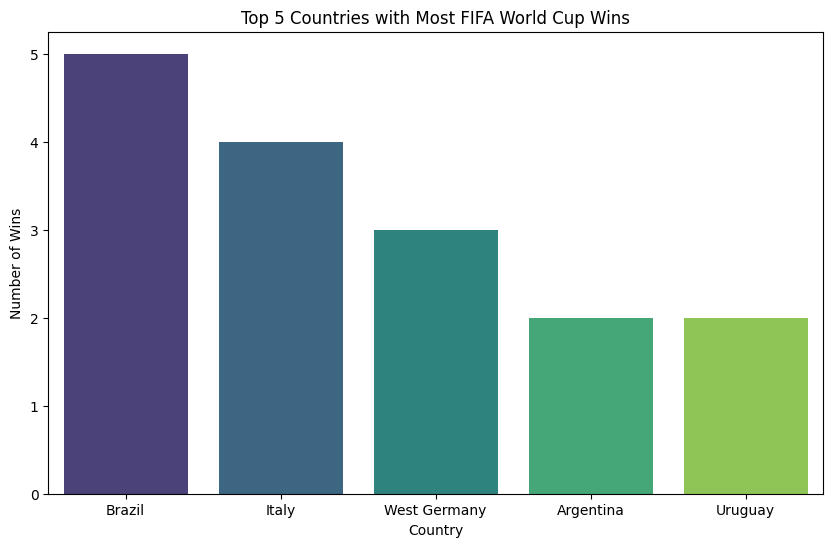

In [25]:
# Plot top 5 winners
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index[:5], y=top_countries.values[:5], palette='viridis')
plt.title('Top 5 Countries with Most FIFA World Cup Wins')
plt.ylabel('Number of Wins')
plt.xlabel('Country')
plt.show()

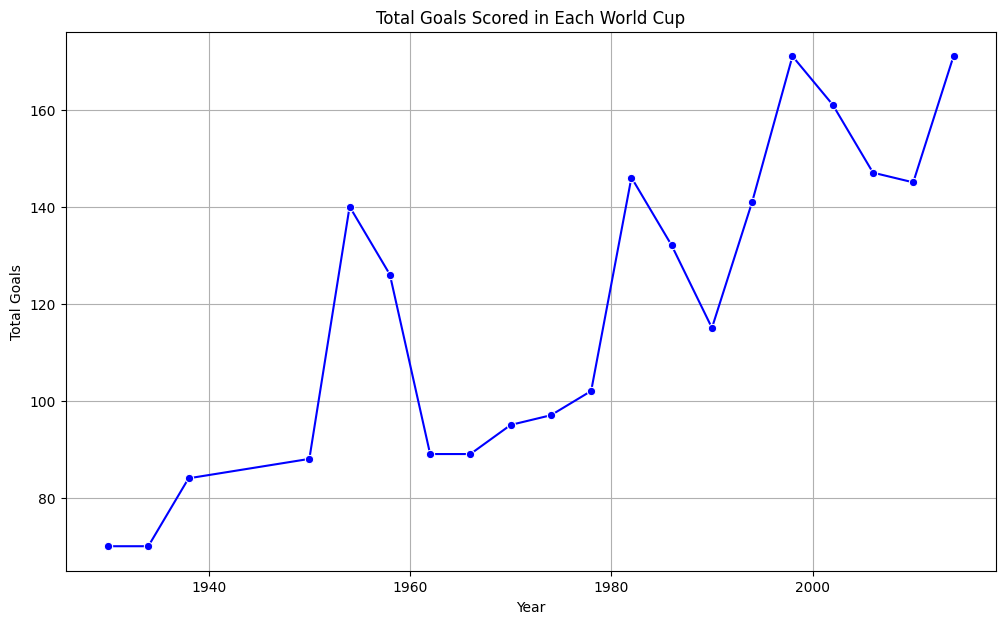

In [26]:
# total goals scored per World Cup
plt.figure(figsize=(12, 7))
sns.lineplot(x=world_cups['Year'], y=world_cups['GoalsScored'], marker='o', color='b')
plt.title('Total Goals Scored in Each World Cup')
plt.ylabel('Total Goals')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [35]:
# Dictionary for host countries based on the World Cup year
host_dict = {
    2018: 'Russia', 2014: 'Brazil', 2010: 'South Africa', 2006: 'Germany',
    2002: 'South Korea/Japan', 1998: 'France', 1994: 'USA',
    1990: 'Italy', 1986: 'Mexico', 1982: 'Spain', 1978: 'Argentina',
    # Add more years and hosts as necessary
}

# Add HostCountry column using the integer values from Year column
world_cups['HostCountry'] = world_cups['Year'].apply(lambda x: host_dict.get(x, 'Unknown'))

# Verify the changes
print(world_cups[['Year', 'HostCountry']].head())

   Year HostCountry
0  1930     Unknown
1  1934     Unknown
2  1938     Unknown
3  1950     Unknown
4  1954     Unknown


Number of times host country won: 2


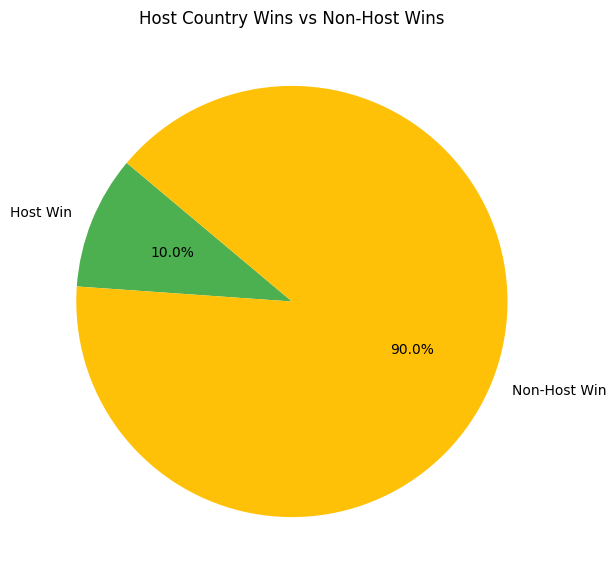

In [36]:
# Count the number of times the host country won
host_winners = world_cups[world_cups['HostCountry'] == world_cups['Winner']].shape[0]

print(f"Number of times host country won: {host_winners}")

# Visualize Host vs. Non-Host Wins
host_wins = ['Host Win', 'Non-Host Win']
host_win_data = [host_winners, len(world_cups) - host_winners]

plt.figure(figsize=(7, 7))
plt.pie(host_win_data, labels=host_wins, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'], startangle=140)
plt.title('Host Country Wins vs Non-Host Wins')
plt.show()

   Home Team Goals  Away Team Goals      Score
0              4.0              1.0  4.0 - 1.0
1              3.0              0.0  3.0 - 0.0
2              2.0              1.0  2.0 - 1.0
3              3.0              1.0  3.0 - 1.0
4              1.0              0.0  1.0 - 0.0


C:\Users\tamal\AppData\Local\Temp\ipykernel_22264\714839681.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorelines.index, y=top_scorelines.values, palette='magma')


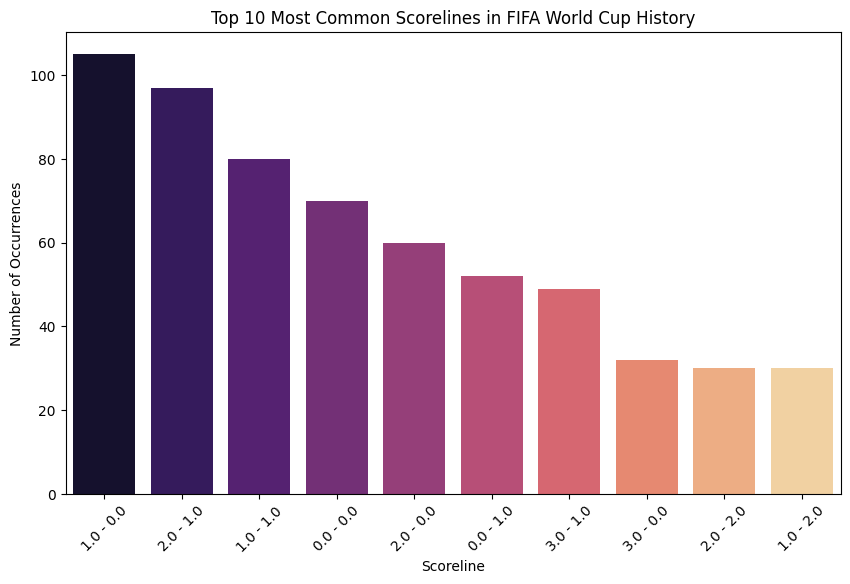

In [43]:
# Assuming the dataset contains 'HomeGoals' and 'AwayGoals' columns
matches['Score'] = matches['Home Team Goals'].astype(str) + ' - ' + matches['Away Team Goals'].astype(str)

# Check if the 'Score' column is created
print(matches[['Home Team Goals', 'Away Team Goals', 'Score']].head())
# Group by scorelines to see the most frequent results
top_scorelines = matches['Score'].value_counts().head(10)

# Plot the most common scorelines
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorelines.index, y=top_scorelines.values, palette='magma')
plt.title('Top 10 Most Common Scorelines in FIFA World Cup History')
plt.ylabel('Number of Occurrences')
plt.xlabel('Scoreline')
plt.xticks(rotation=45)
plt.show()

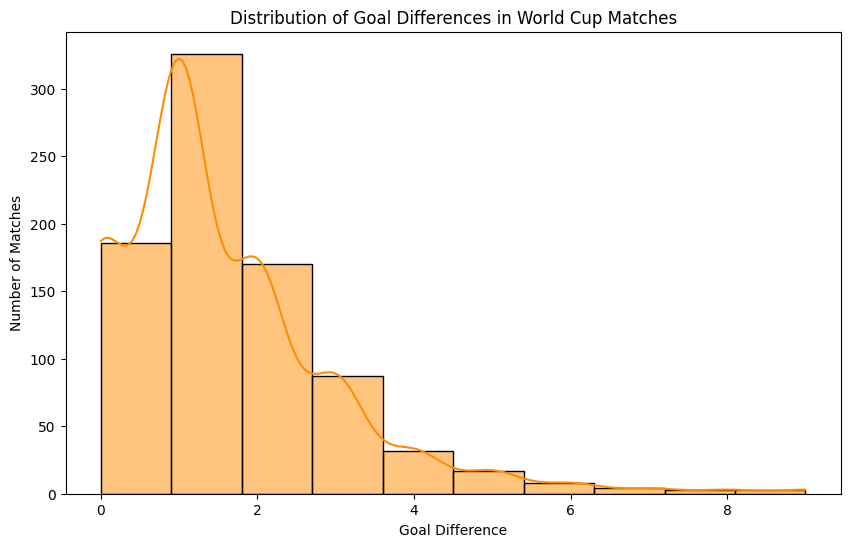

In [45]:
# Add a Goal Difference column (if not done during cleaning)
matches['GoalDifference'] = abs(matches['Home Team Goals'] - matches['Away Team Goals'])

# Visualize the distribution of goal differences
plt.figure(figsize=(10, 6))
sns.histplot(matches['GoalDifference'], bins=10, kde=True, color='darkorange')
plt.title('Distribution of Goal Differences in World Cup Matches')
plt.xlabel('Goal Difference')
plt.ylabel('Number of Matches')
plt.show()

In [48]:
# Predicting whether home team wins based on goals
matches['HomeWin'] = matches['Home Team Goals'] > matches['Away Team Goals']

# Features: Goal data
X = matches[['Home Team Goals', 'Away Team Goals']]
y = matches['HomeWin']

# Spliting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [49]:
world_cups.to_csv('final_world_cup_analysis.csv', index=False)
matches.to_csv('final_matches_analysis.csv', index=False)